In [25]:
import numpy as np
import pandas as pd
import fs_qe as fq

%matplotlib inline

## 1 import data

In [26]:
df1 = fq.importdata2(file='data/fortune1000-employee-2020.csv', year='2020')
df2 = fq.importdata2(file='data/fortune1000-employee-2019.csv', year='2019')
df3 = fq.importdata2(file='data/fortune1000-employee-2018.csv', year='2018')
df4 = fq.importdata2(file='data/fortune1000-employee-2017.csv', year='2017')
df5 = fq.importdata2(file='data/fortune1000-employee-2016.csv', year='2016')
df6 = fq.importdata2(file='data/fortune1000-employee-2015.csv', year='2015')

## 2 merge

In [27]:
df_x1 = pd.merge(df2, df1, on='name')[['2019', '2020']]
df_x2 = pd.merge(df3, df2, on='name')[['2018', '2019']]
df_x3 = pd.merge(df4, df3, on='name')[['2017', '2018']]
df_x4 = pd.merge(df5, df4, on='name')[['2016', '2017']]
df_x5 = pd.merge(df6, df5, on='name')[['2015', '2016']]

## 3 firm size and growth

In [28]:
df_x011 = df_x1.stack()
df_x021 = df_x2.stack()
df_x031 = df_x3.stack()
df_x041 = df_x4.stack()
df_x051 = df_x5.stack()

In [29]:
df_x012 = df_x011.to_frame().reset_index()
df_x022 = df_x021.to_frame().reset_index()
df_x032 = df_x031.to_frame().reset_index()
df_x042 = df_x041.to_frame().reset_index()
df_x052 = df_x051.to_frame().reset_index()

In [30]:
df_x012.columns = 'id', 'year', 'employee'
df_x022.columns = 'id', 'year', 'employee'  
df_x032.columns = 'id', 'year', 'employee'  
df_x042.columns = 'id', 'year', 'employee'  
df_x052.columns = 'id', 'year', 'employee' 

In [31]:
df_x013 = df_x012.set_index(['id', 'year'])
df_x023 = df_x022.set_index(['id', 'year'])
df_x033 = df_x032.set_index(['id', 'year'])
df_x043 = df_x042.set_index(['id', 'year'])
df_x053 = df_x052.set_index(['id', 'year'])

In [32]:
df_x013[df_x013['employee'] == 'n.a.'] = np.nan
df_x023[df_x023['employee'] == 'n.a.'] = np.nan
df_x033[df_x033['employee'] == 'n.a.'] = np.nan
df_x043[df_x043['employee'] == 'n.a.'] = np.nan
df_x053[df_x053['employee'] == 'n.a.'] = np.nan

In [33]:
df_x013[df_x013['employee'] == '0'] = np.nan
df_x023[df_x023['employee'] == '0'] = np.nan
df_x033[df_x033['employee'] == '0'] = np.nan
df_x043[df_x043['employee'] == '0'] = np.nan
df_x053[df_x053['employee'] == '0'] = np.nan

In [34]:
df_x013['employee'] = df_x013['employee'].astype(float)
df_x023['employee'] = df_x023['employee'].astype(float)
df_x033['employee'] = df_x033['employee'].astype(float)
df_x043['employee'] = df_x043['employee'].astype(float)
df_x053['employee'] = df_x053['employee'].astype(float)

In [35]:
df_x014 = df_x013.reset_index('id')
df_x024 = df_x023.reset_index('id')
df_x034 = df_x033.reset_index('id')
df_x044 = df_x043.reset_index('id')
df_x054 = df_x053.reset_index('id')

In [36]:
df_x014['logemployee'] = np.log(df_x014['employee'])
df_x024['logemployee'] = np.log(df_x024['employee'])
df_x034['logemployee'] = np.log(df_x034['employee'])
df_x044['logemployee'] = np.log(df_x044['employee'])
df_x054['logemployee'] = np.log(df_x054['employee'])

In [37]:
df_x014['fgrow_log'] = -1 * df_x014.groupby('id')['logemployee'].diff(periods=-1)
df_x024['fgrow_log'] = -1 * df_x024.groupby('id')['logemployee'].diff(periods=-1) 
df_x034['fgrow_log'] = -1 * df_x034.groupby('id')['logemployee'].diff(periods=-1) 
df_x044['fgrow_log'] = -1 * df_x044.groupby('id')['logemployee'].diff(periods=-1) 
df_x054['fgrow_log'] = -1 * df_x054.groupby('id')['logemployee'].diff(periods=-1) 

In [38]:
df_x015 = df_x014.dropna().reset_index()
df_x025 = df_x024.dropna().reset_index()
df_x035 = df_x034.dropna().reset_index()
df_x045 = df_x044.dropna().reset_index()
df_x055 = df_x054.dropna().reset_index()

In [39]:
df_x016 = df_x015[df_x015['fgrow_log'] != 0.0]
df_x026 = df_x025[df_x025['fgrow_log'] != 0.0]
df_x036 = df_x035[df_x035['fgrow_log'] != 0.0]
df_x046 = df_x045[df_x045['fgrow_log'] != 0.0]
df_x056 = df_x055[df_x055['fgrow_log'] != 0.0]

In [40]:
df_x017 = df_x016[df_x016['fgrow_log'] != np.inf]
df_x027 = df_x026[df_x026['fgrow_log'] != np.inf]
df_x037 = df_x036[df_x036['fgrow_log'] != np.inf]
df_x047 = df_x046[df_x046['fgrow_log'] != np.inf]
df_x057 = df_x056[df_x056['fgrow_log'] != np.inf]

In [41]:
df_x018 = df_x017[df_x017['fgrow_log'] != - np.inf]
df_x028 = df_x027[df_x027['fgrow_log'] != - np.inf]
df_x038 = df_x037[df_x037['fgrow_log'] != - np.inf]
df_x048 = df_x047[df_x047['fgrow_log'] != - np.inf]
df_x058 = df_x057[df_x057['fgrow_log'] != - np.inf]

In [42]:
df_x019 = df_x018[df_x018['employee'] != 0.0]
df_x029 = df_x028[df_x028['employee'] != 0.0]
df_x039 = df_x038[df_x038['employee'] != 0.0]
df_x049 = df_x048[df_x048['employee'] != 0.0]
df_x059 = df_x058[df_x058['employee'] != 0.0]

In [43]:
df_x0110 = df_x019[df_x019['logemployee'] > 0.0]
df_x0210 = df_x029[df_x029['logemployee'] > 0.0]
df_x0310 = df_x039[df_x039['logemployee'] > 0.0]
df_x0410 = df_x049[df_x049['logemployee'] > 0.0]
df_x0510 = df_x059[df_x059['logemployee'] > 0.0]

## 4 append

In [44]:
dfx1 = df_x0110.append(df_x0210, ignore_index=True)
dfx2 = dfx1.append(df_x0310, ignore_index=True)
dfx3 = dfx2.append(df_x0410, ignore_index=True)
df_us = dfx3.append(df_x0510, ignore_index=True)


## 5 save and display

In [45]:
df_us.to_csv('data/us_topemployee.csv')

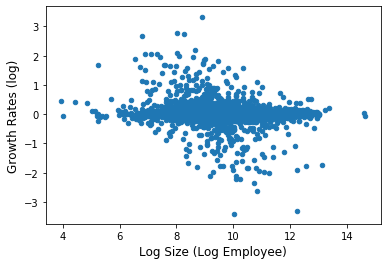

In [46]:
fq.scatterplot(df_us, x='logemployee', xlabel='Log Size (Log Employee)')